In [148]:
#import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.shape

(15509, 10)

In [5]:
#Checking Missing Valules
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

###  * Data has alots of Missing Values

# Data Cleaning:

In [11]:
# Remove rows with missing values in columns 1 to 9
df.dropna(subset=df.columns[1:9], how='all', inplace=True)

In [13]:
df.head() #Display first 5 rows of data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [15]:
df.duplicated().sum()

6

In [16]:
df.drop_duplicates(inplace=True) # remove duplicate rows based on all columns

In [17]:
df.duplicated().sum()

0

In [18]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
df.columns #Display all columns names

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [19]:
df.dropna(inplace=True) #Remove all NaN Values

In [20]:
df.isnull().sum() 

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [28]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [30]:
#Clean Year, Duration and votes column 
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True)
df['Duration']=df['Duration'].str.replace(r' min', '', regex=True)

In [38]:
df['Votes']=df['Votes'].str.replace(',','')

In [41]:
#Change Data Type to int
int_columns=['Year', 'Duration','Votes']
df[int_columns] = df[int_columns].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [42]:
df.head() #Clean Data Set

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Exporatory Data Analysis :

In [247]:
#Pot Distribution of Years
year_fig = px.histogram(df, x='Year', nbins=30, histnorm='probability density', color_discrete_sequence=['#8B15BA'])
year_fig.update_layout(title='Distribution of Year', bargap=0.02, plot_bgcolor = 'white')
year_fig.show();

In [246]:
#Plot Distribution of Duration
duration_fig=px.histogram(df, x='Duration', histnorm='probability density', nbins=30, color_discrete_sequence=['#8B15BA'])
duration_fig.update_layout(title='Distribution of Duration', bargap=0.02, plot_bgcolor='white')
duration_fig.show();

In [245]:
#Plot Distribution of Rating
rating_fig=px.histogram(df, x='Rating', histnorm='probability density', nbins=30, color_discrete_sequence=['#8B15BA'])
rating_fig.update_layout(title='Distribution of Rating', bargap=0.02, plot_bgcolor='white')
rating_fig.show();

In [244]:
#Plot Distribution of Votes by Year
votes_fig = px.scatter(df, x='Year', y='Votes', color_discrete_sequence=['#8B15BA'])
votes_fig.update_layout(title='Distribution of Votes by Year', bargap=0.02, plot_bgcolor='white')
votes_fig.show();

In [219]:
#Plot Top 10 Years by Rating
year_avg_rating=df.groupby('Year')['Rating'].mean().reset_index()
#year_avg_rating.sort_values(by=['Rating'], ascending=False).head()
top_10_years=year_avg_rating.nlargest(10,'Rating')
top_year_fig = px.bar(top_10_years, x='Year',y='Rating', color = "Rating")
top_year_fig.update_layout(title='Top 10 Years by Rating', xaxis_title='Year', yaxis_title='Avarage_Rating', plot_bgcolor='white')
top_year_fig.show();

In [248]:
#Plot trand in rating across year
year_avg_rating = df.groupby('Year')['Rating'].mean().reset_index()
rating_trand_fig = px.line(year_avg_rating, x='Year', y='Rating', color_discrete_sequence=['#8B15BA'])
rating_trand_fig.update_layout(title='Trand in Rating Across Year', plot_bgcolor='white')
rating_trand_fig.show()

In [241]:
#Plot trand in Votes across year
average_votes_by_year = df.groupby('Year')['Votes'].mean().reset_index()
average_votes_fig = px.line(average_votes_by_year, x='Year', y='Votes', color_discrete_sequence=['#8B15BA'])
average_votes_fig.update_layout(title='Trand in Votes Across Year', xaxis_title='Year', yaxis_title='# of Votes', plot_bgcolor='white')
average_votes_fig.show()

## Does length of movie have any impact on rating?

In [255]:
#Plot Duration VS Rating
dur_rat_fig=px.scatter(df, x='Duration', y='Rating', color='Rating', trendline='ols')
dur_rat_fig.update_layout(title='Duration VS Rating', plot_bgcolor='white')
dur_rat_fig.show();

## Does length of movie have any impact on Votes?

In [256]:
#Plot Duration VS Votes
dur_vot_fig=px.scatter(df, x='Duration', y='Votes', color='Rating', trendline='ols')
dur_vot_fig.update_layout(title='Duration VS Votes', plot_bgcolor='white')
dur_vot_fig.show();

## Does Ratings of movie have any impact on Votes?

In [257]:
#Plot Rating VS Votes
rat_vot_fig=px.scatter(df, x='Rating', y='Votes', color='Rating', trendline='ols')
rat_vot_fig.update_layout(title='Duration VS Votes', plot_bgcolor='white')
rat_vot_fig.show();

# Data Preprocessing :

In [ ]:
# Dropping non essential columns
df.drop('Name', axis=1, inplace=True) #Drop Name column because name does not impect on Rating

In [266]:
df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


##  Feature Engineering:

In [277]:
# Grouping the columns with their average rating and then creating a new feature
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['director_mean_rating'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['actor1_mean_rating'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['actor2_mean_rating'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['actor3_mean_rating'] = actor3_mean_rating

In [280]:
#Dropping Categorical Columns
df_final= df.drop(['Genre', 'Director', 'Actor 1', 'Actor 2','Actor 3'], axis=1)

In [281]:
df_final

,Year,Duration,Rating,Votes,genre_mean_rating,director_mean_rating,actor1_mean_rating,actor2_mean_rating,actor3_mean_rating
1,2019,109,7.0,8,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,4.4,35,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,4.7,827,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,7.4,1086,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,5.6,326,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...
15493,2015,115,6.1,408,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,6.2,1496,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,5.8,44,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,4.5,655,5.516505,5.225000,5.481707,4.640000,5.737500


In [282]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  5659 non-null   int32  
 1   Duration              5659 non-null   int32  
 2   Rating                5659 non-null   float64
 3   Votes                 5659 non-null   int32  
 4   genre_mean_rating     5659 non-null   float64
 5   director_mean_rating  5659 non-null   float64
 6   actor1_mean_rating    5659 non-null   float64
 7   actor2_mean_rating    5659 non-null   float64
 8   actor3_mean_rating    5659 non-null   float64
dtypes: float64(6), int32(3)
memory usage: 375.8 KB


## Create X (predictor ) and y (target) variable:

In [289]:
X = df_final.drop('Rating', axis=1)
y=df_final['Rating']

## Split the data into test and train:


In [290]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Model Building:

In [422]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [423]:
gbr = GradientBoostingRegressor()
en = ElasticNet()
sg = SGDRegressor()
svr = SVR()
br = BayesianRidge()
kr = KernelRidge()
lr = LinearRegression()
rfr = RandomForestRegressor()

In [424]:
#Create Dictinory of Clfs
clfs={
    'gbr' :gbr,
    'en' :en,
    'sg'  :sg,
    'svr':svr,
    'br':br,
    'kr':kr,
    'lr':lr,
    'rfr':rfr
}

# Model Evaluation:
Calculate :> accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [425]:
# Function for Calculate accuracy_score, mean_absolute_error, mean_squared_error, r2_score
def train_classifer(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)    
    y_pred = clf.predict(X_test)
    Score = clf.score(X_test, y_test)    
    Squared_error = mean_squared_error(y_test, y_pred)
    Absolute_error = mean_absolute_error(y_test, y_pred)
    R2score = r2_score(y_test, lr_pred)
    return Score, Squared_error, Absolute_error, R2score

In [441]:
Score_list=[]
Squared_error_list=[]
Absolute_error_list=[]
r2score_list=[]

for name, clf in clfs.items():
    current_Score, current_Squared_error, current_Absolute_error, current_r2score = train_classifer(clf,X_train,y_train,X_test,y_test)
    
    print('The performance evaluation of {}'.format(name), '\n')
    print('Score: ',current_Score)
    print('Mean squared error: ',current_Squared_error)
    print('Mean absolute error: ',current_Absolute_error)
    print('R2 score:: ',current_r2score)    
    print('\n', '='*100, '\n')
    
    Score_list.append(current_Score)
    Squared_error_list.append(current_Squared_error)
    Absolute_error_list.append(current_Absolute_error)
    r2score_list.append(current_r2score)
    
    

The performance evaluation of gbr 

Score:  0.8281195811314637
Mean squared error:  0.3031506187753571
Mean absolute error:  0.40851618242422705
R2 score::  0.7976465601792181


The performance evaluation of en 

Score:  0.6074088511129179
Mean squared error:  0.6924247130318899
Mean absolute error:  0.6659555749694361
R2 score::  0.7976465601792181


The performance evaluation of sg 

Score:  -2.866174105310777e+30
Mean squared error:  5.055156714549533e+30
Mean absolute error:  1157889078584453.5
R2 score::  0.7976465601792181


The performance evaluation of svr 

Score:  0.018961261560502263
Mean squared error:  1.730287269243854
Mean absolute error:  1.03480525301258
R2 score::  0.7976465601792181


The performance evaluation of br 

Score:  0.797698058020002
Mean squared error:  0.35680596599895303
Mean absolute error:  0.44857596946084355
R2 score::  0.7976465601792181


The performance evaluation of kr 

Score:  0.7973918695024951
Mean squared error:  0.35734599981522586
Mean ab

# Creating Performance Data Frame:

In [442]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Score':Score_list, 'Mean squared error':Squared_error_list, 'Mean absolute error':Absolute_error_list,'R2 score':r2score_list })

In [443]:
performance_df

,Algorithm,Score,Mean squared error,Mean absolute error,R2 score
0,gbr,8.281196e-01,3.031506e-01,4.085162e-01,0.797647
1,en,6.074089e-01,6.924247e-01,6.659556e-01,0.797647
2,sg,-2.866174e+30,5.055157e+30,1.157889e+15,0.797647
3,svr,1.896126e-02,1.730287e+00,1.034805e+00,0.797647
4,br,7.976981e-01,3.568060e-01,4.485760e-01,0.797647
5,kr,7.973919e-01,3.573460e-01,4.490084e-01,0.797647
6,lr,7.976466e-01,3.568968e-01,4.486609e-01,0.797647
7,rfr,8.286225e-01,3.022636e-01,3.806184e-01,0.797647


In [444]:
performance_df.sort_values(by=['R2 score'], ascending=False)

,Algorithm,Score,Mean squared error,Mean absolute error,R2 score
0,gbr,8.281196e-01,3.031506e-01,4.085162e-01,0.797647
1,en,6.074089e-01,6.924247e-01,6.659556e-01,0.797647
2,sg,-2.866174e+30,5.055157e+30,1.157889e+15,0.797647
3,svr,1.896126e-02,1.730287e+00,1.034805e+00,0.797647
4,br,7.976981e-01,3.568060e-01,4.485760e-01,0.797647
5,kr,7.973919e-01,3.573460e-01,4.490084e-01,0.797647
6,lr,7.976466e-01,3.568968e-01,4.486609e-01,0.797647
7,rfr,8.286225e-01,3.022636e-01,3.806184e-01,0.797647


In [445]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [446]:
performance_df1

,Algorithm,variable,value
0,gbr,Score,8.281196e-01
1,en,Score,6.074089e-01
2,sg,Score,-2.866174e+30
3,svr,Score,1.896126e-02
4,br,Score,7.976981e-01
5,kr,Score,7.973919e-01
6,lr,Score,7.976466e-01
7,rfr,Score,8.286225e-01
8,gbr,Mean squared error,3.031506e-01
9,en,Mean squared error,6.924247e-01


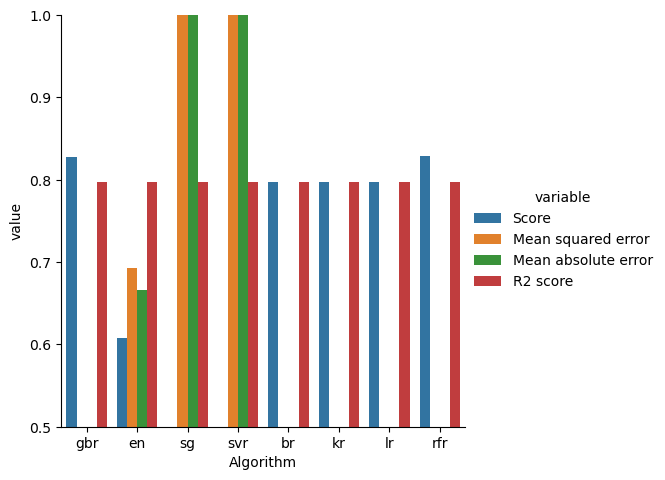

In [455]:
import matplotlib.pyplot as plt
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
#plt.xticks(rotation='vertical')
plt.show()